In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss

from matplotlib import pyplot as plt

In [55]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
tb_data = pd.read_csv('../../../data/train.csv', index_col='id')
tb_data

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,A,B,A,C,B,B,A,E,E,L,...,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630,8.343538
499996,A,B,A,C,B,B,A,E,E,L,...,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902,7.851861
499997,A,B,A,C,B,B,A,E,C,M,...,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041,7.600558


In [3]:
tb_num_data = tb_data.select_dtypes(include=np.number)
tb_num_data

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,
1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630,8.343538
499996,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902,7.851861
499997,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041,7.600558


In [32]:
sample1 = tb_num_data.sample(frac=0.25, replace=False, random_state=16)
sample2 = tb_num_data.sample(frac=0.25, replace=False, random_state=32)
sample3 = tb_num_data.sample(frac=0.25, replace=False, random_state=48)

In [33]:
sample1

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,
464180,0.627940,0.114740,0.127371,0.803806,0.278405,0.754354,0.430064,0.764639,0.645636,0.825233,0.625329,0.723337,0.683346,0.342773,6.960204
476596,0.938227,0.293191,0.133516,0.740871,0.347869,1.006011,0.594162,0.757502,0.868413,0.785172,0.864705,0.748147,0.857630,0.799129,7.722103
65643,0.891362,0.617701,0.201493,0.765015,0.280415,0.941650,0.561031,0.702773,0.920995,0.736316,0.648235,0.688919,0.889852,0.346325,6.907352
79696,0.873927,0.290432,0.207220,0.597589,0.741753,0.853782,0.627180,0.709129,0.955353,0.834207,0.592929,0.970048,0.842534,0.278482,6.908706
113664,0.509953,0.753094,0.708284,0.597535,0.876933,0.352342,0.378063,0.456273,0.356980,0.763117,0.459203,0.329738,0.723124,0.786789,7.200313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417295,0.643555,0.652069,0.417444,0.615570,0.527618,0.665916,0.660700,0.487699,0.425889,0.746699,0.715449,0.755372,0.331798,0.205832,6.244152
29069,0.294265,0.788330,0.496886,0.233292,0.512281,0.323478,0.231400,0.588495,0.323455,0.324711,0.286046,0.306285,0.317721,0.600413,8.727023
459113,0.438122,0.237943,0.670719,0.190990,0.278659,0.348503,0.380474,0.733849,0.338042,0.454154,0.391929,0.677990,0.353175,0.807151,7.239164


In [34]:
sample2

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,
258166,0.326821,0.691297,0.486476,0.636197,0.277751,0.931796,0.306882,0.704489,0.307890,0.244375,0.609101,0.236460,0.383632,0.836204,5.994884
319475,0.693545,0.629306,0.546437,0.207921,0.279122,0.937039,0.464970,0.248563,0.769784,0.492299,0.697903,0.689309,0.739973,0.289922,6.201727
442040,0.547223,0.615898,0.413513,0.221499,0.528931,0.374200,0.919381,0.343388,0.466764,0.850241,0.726438,0.415175,0.376894,0.798545,6.115697
189925,0.516924,0.420593,0.378334,0.222019,0.756025,0.216450,0.313544,0.248170,0.463793,0.385912,0.343311,0.740747,0.321862,0.458532,7.194698
375935,0.884291,0.082917,0.024240,0.277461,0.520257,0.929883,0.439037,0.405699,0.892822,0.797392,0.585335,0.975025,0.836145,0.825113,9.825741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,0.408366,0.423317,0.161771,0.163662,0.533645,0.424619,0.431076,0.286787,0.118502,0.433911,0.551435,0.466955,0.443643,0.740193,7.222104
160370,0.716363,0.073731,0.930780,0.178436,0.760368,0.768662,0.576328,0.436559,0.288989,0.498745,0.227648,0.891411,0.231266,0.549940,6.518618
376418,0.491202,0.488489,0.862160,0.199609,0.279853,0.399914,0.364231,0.251749,0.328151,0.364956,0.414458,0.317563,0.303590,0.298723,6.776083


In [35]:
sample3

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,
336549,0.465471,0.073811,0.325218,0.659369,0.419968,0.188571,0.215520,0.760844,0.351721,0.267730,0.316922,0.345833,0.781399,0.711221,7.914181
7175,0.674258,0.026109,0.343748,0.588496,0.694612,0.367883,0.283778,0.468540,0.285855,0.285358,0.230129,0.294627,0.315843,0.393656,8.743115
130865,0.780397,0.296344,0.475524,0.508100,0.444869,0.877676,0.308341,0.746699,0.761891,0.337715,0.592996,0.377056,0.317914,0.841006,9.275778
303289,0.514929,0.296613,0.276459,0.732973,0.734162,0.743614,0.589193,0.425581,0.499263,0.725050,0.471861,0.891502,0.710621,0.698542,6.739740
416804,0.189421,0.553612,0.524075,0.188048,0.279815,0.206256,0.268668,0.726891,0.276574,0.154394,0.334318,0.205308,0.388032,0.323511,8.054364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47557,0.504353,0.241062,0.927078,0.369376,0.421690,0.279894,0.293029,0.294238,0.068375,0.157577,0.276622,0.291620,0.275897,0.472455,6.677579
75267,0.472149,0.665679,0.613485,0.398411,0.418847,0.232968,0.224834,0.254865,0.317516,0.324876,0.292974,0.212850,0.326029,0.368421,7.588179
97641,0.715926,0.352593,0.201963,0.347131,0.745291,0.534849,0.442631,0.694781,0.458908,0.788308,0.365338,0.690417,0.756459,0.286444,6.514236


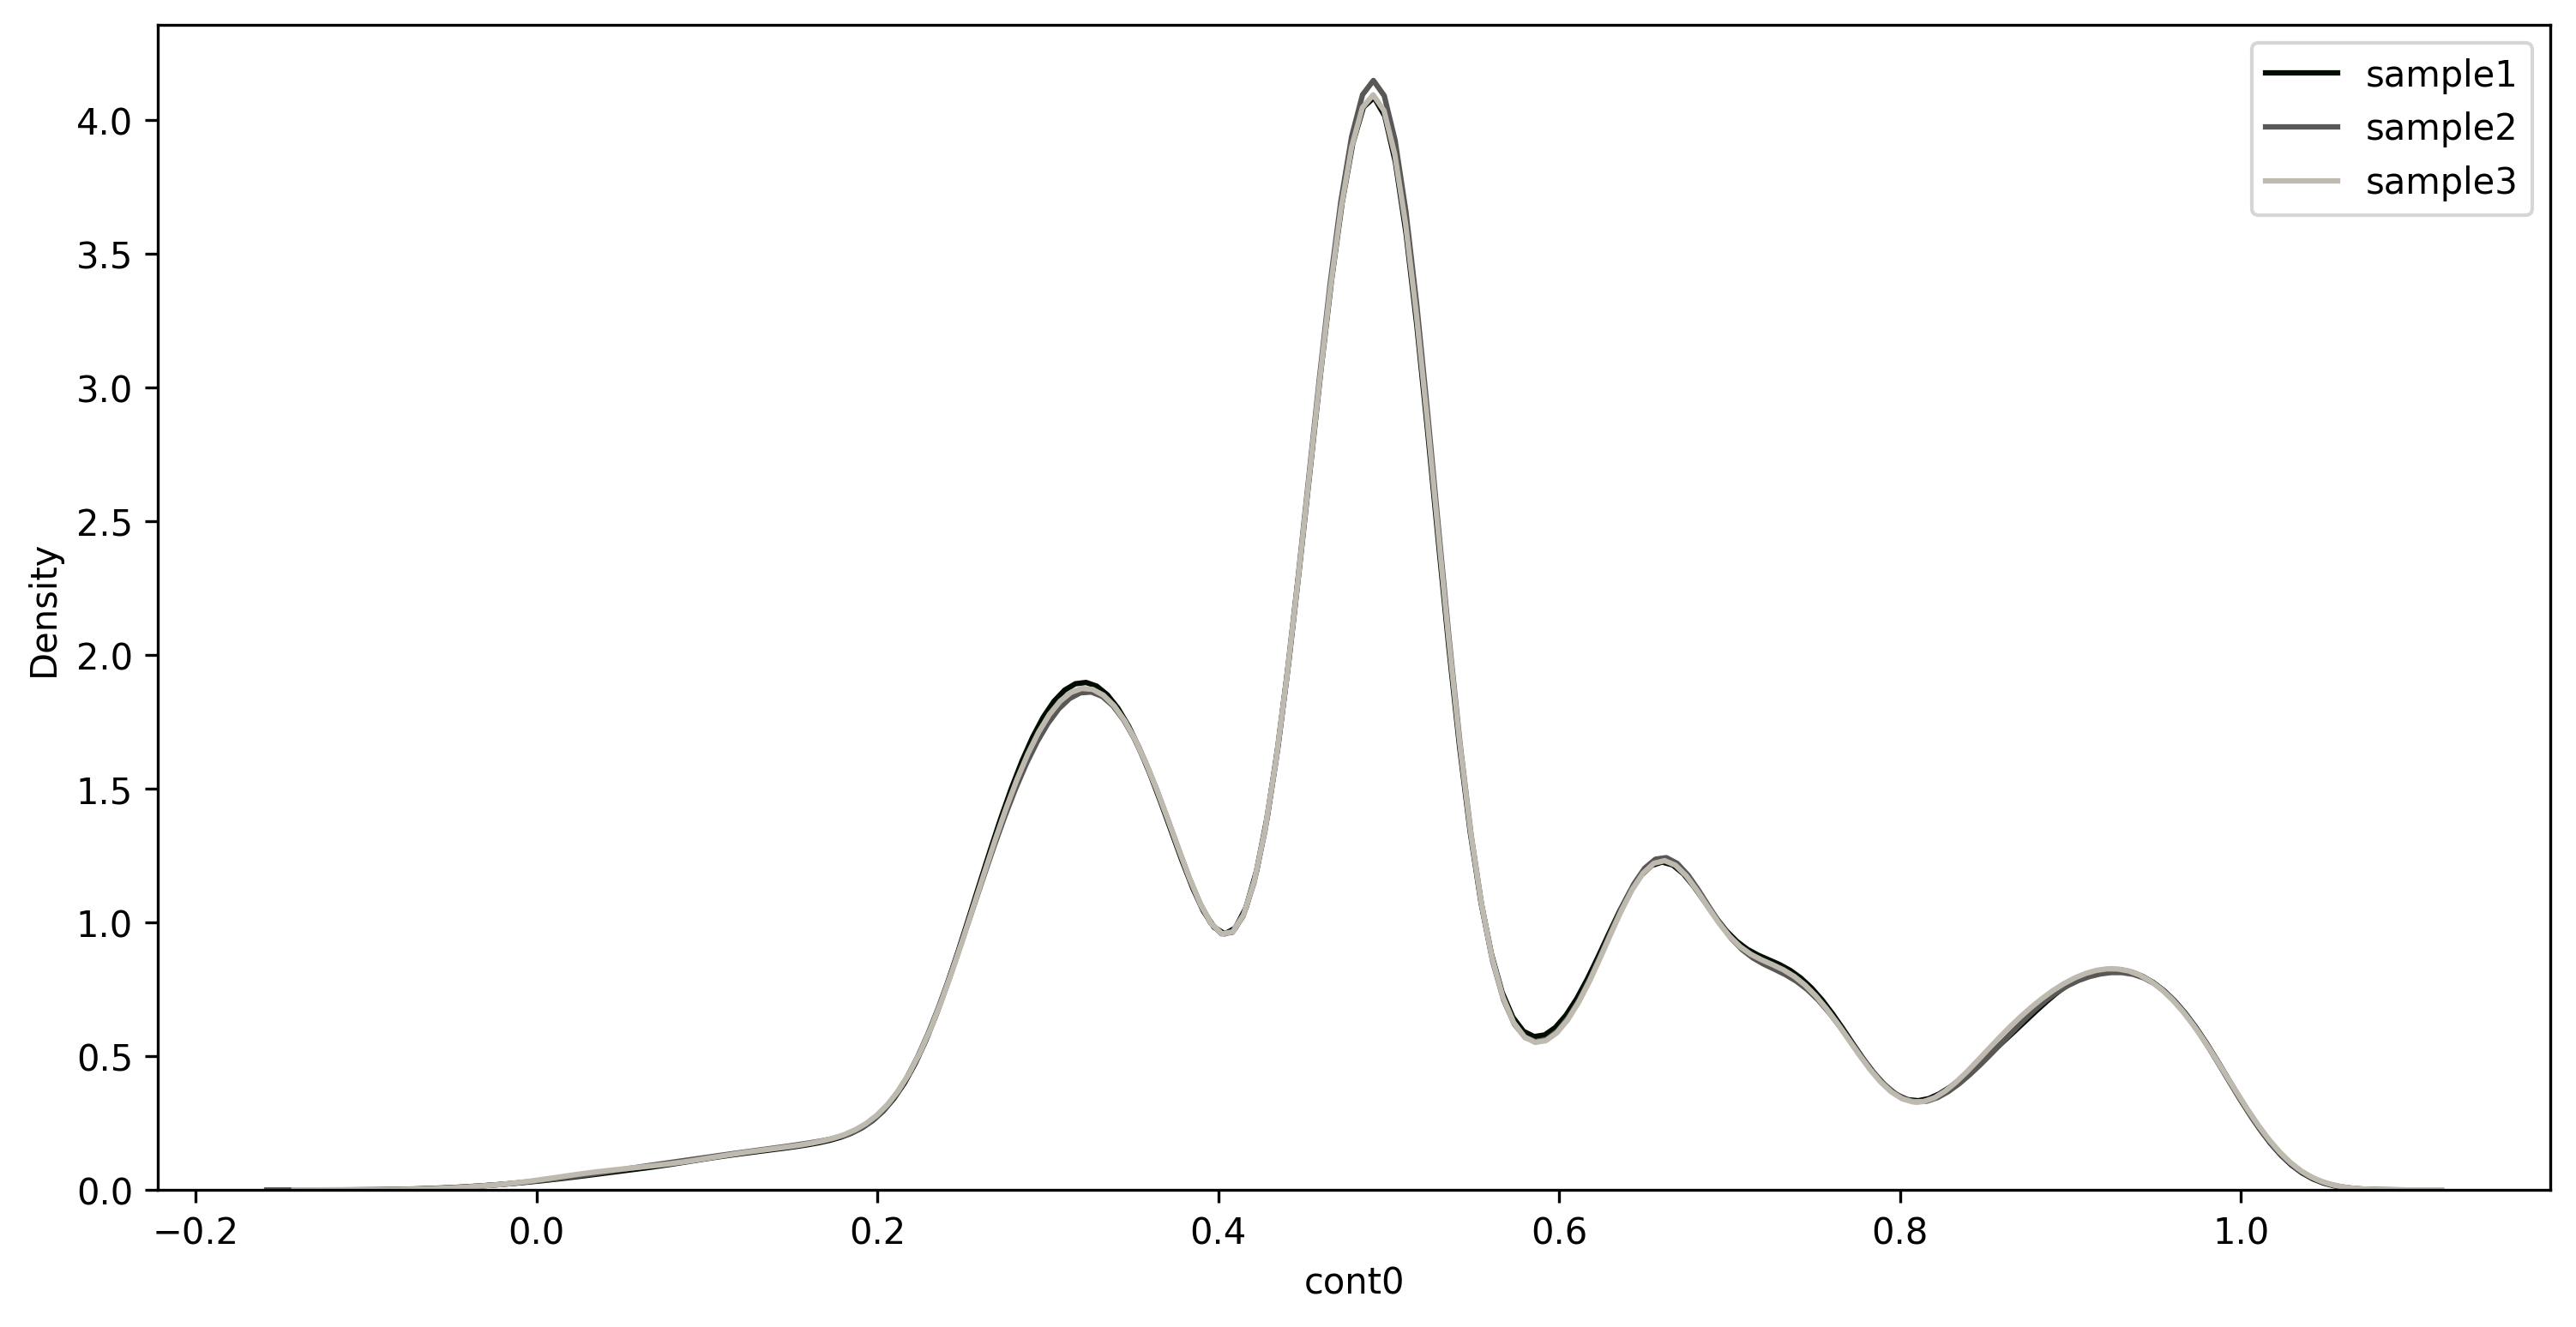

In [39]:
plt.figure(figsize=[12, 6], dpi=300)
sns.kdeplot(x=sample1['cont0'], color='#010D00', label='sample1')
sns.kdeplot(x=sample2['cont0'], color='#595856', label='sample2')
sns.kdeplot(x=sample3['cont0'], color='#BFBAB0', label='sample3')
plt.legend()
plt.savefig('../../../graphs/cont_0_hist.png')
plt.show()

In [56]:
plt.figure(figsize=[64, 20], dpi=300)
sns.lineplot(x=np.array(range(0, sample1.shape[0], 1)),
             y=np.sin(sample1['cont0']),
             color='#000')
plt.savefig('../../../graphs/run_plot_cont0.png')
plt.show()

In [57]:
plt.figure(figsize=[64, 20], dpi=300)
sns.lineplot(x=np.array(range(0, sample1.shape[0], 1)),
             y=np.sin(sample2['cont0']),
             color='#000')
plt.savefig('../../../graphs/run_plot_cont0_s2.png')
plt.show()

In [58]:
plt.figure(figsize=[64, 20], dpi=300)
sns.lineplot(x=np.array(range(0, sample1.shape[0], 1)),
             y=np.sin(sample3['cont0']),
             color='#000')
plt.savefig('../../../graphs/run_plot_cont0_s3.png')
plt.show()